Epoch 1/10
704/704 [==============================] - 8s 11ms/step - loss: 1.6069 - accuracy: 0.4124 - val_loss: 1.3414 - val_accuracy: 0.5118
Epoch 2/10
704/704 [==============================] - 8s 11ms/step - loss: 1.2365 - accuracy: 0.5576 - val_loss: 1.1834 - val_accuracy: 0.5774
Epoch 3/10
704/704 [==============================] - 7s 11ms/step - loss: 1.0902 - accuracy: 0.6147 - val_loss: 1.0553 - val_accuracy: 0.6346
Epoch 4/10
704/704 [==============================] - 7s 11ms/step - loss: 0.9894 - accuracy: 0.6512 - val_loss: 1.0785 - val_accuracy: 0.6224
Epoch 5/10
704/704 [==============================] - 8s 11ms/step - loss: 0.9184 - accuracy: 0.6753 - val_loss: 0.9228 - val_accuracy: 0.6774
Epoch 6/10
704/704 [==============================] - 8s 11ms/step - loss: 0.8630 - accuracy: 0.6972 - val_loss: 0.9845 - val_accuracy: 0.6672
Epoch 7/10
704/704 [==============================] - 8s 11ms/step - loss: 0.8139 - accuracy: 0.7128 - val_loss: 0.9190 - val_accuracy: 0.6800

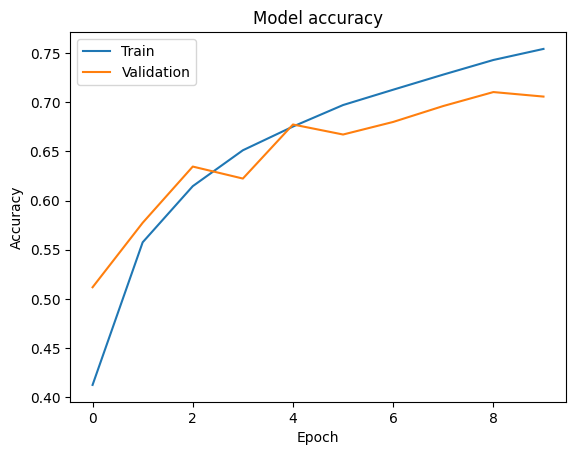

313/313 [==============================] - 1s 3ms/step


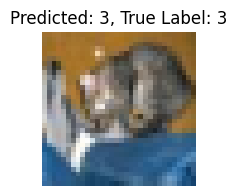

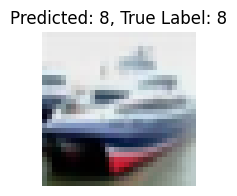

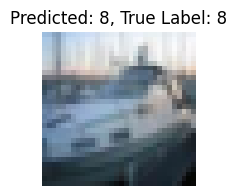

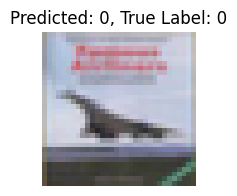

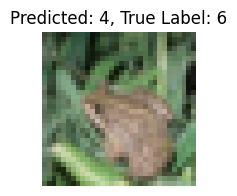

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=64)


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


predictions = model.predict(x_test)

for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predictions[i].argmax()}, True Label: {y_test[i].argmax()}")
    plt.axis('off')
    plt.show()


In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


313/313 [==============================] - 1s 4ms/step - loss: 0.9027 - accuracy: 0.6893
Test accuracy: 0.6893
Test loss: 0.9027


In [ ]:

predictions = model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


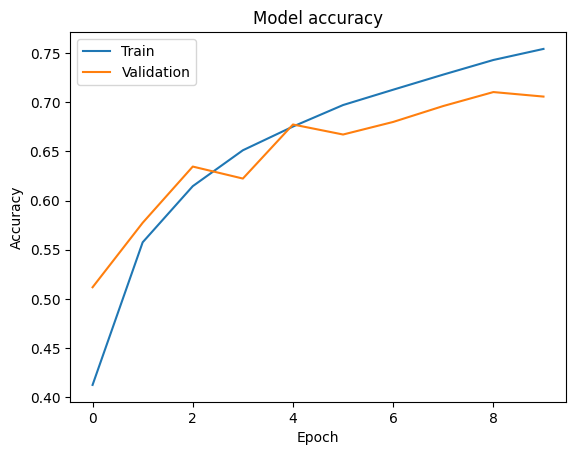

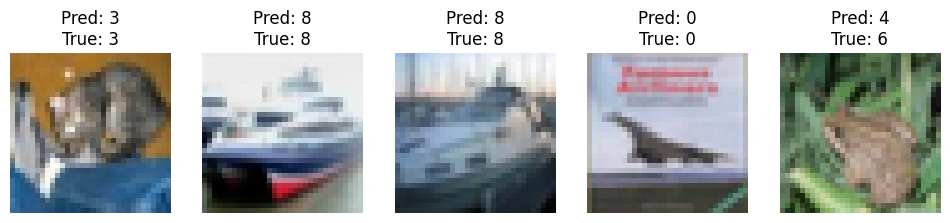

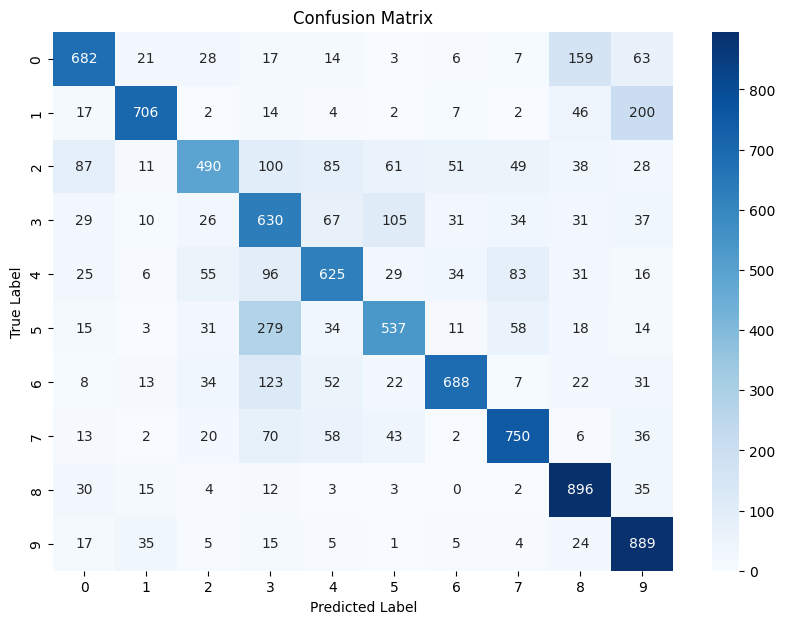

In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix # importing the confusion_matrix function


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Pred: {predictions[i].argmax()}\nTrue: {labels[i].argmax()}")
        plt.axis('off')
    plt.show()

plot_images(x_test, y_test, predictions)


y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()